 ## Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [3]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churnData.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

In [7]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

#churnData.loc[488, 'TotalCharges'] = churnData.TotalCharges.mean()

### Dealing with Missing values

In [7]:
#churnData.isnull()

churnData =churnData.fillna(churnData.mean()) # replaces all Na with mean


#df.fillna(df.mean(), inplace=True) - Also works 

# churnData.isnull().values.any() ## check if any NA left - No 

/var/folders/np/_4nsf5195pl0jfyhg25kr9q80000gn/T/ipykernel_16205/2800081614.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  churnData =churnData.fillna(churnData.mean()) # replaces all Na with mean


In [8]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [9]:
df_features = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data

In [10]:
## Apply standard scalar

scaler= StandardScaler().fit(df_features)

df_scaled = scaler.transform(df_features)

In [11]:
df_scaled

array([[-1.27744458, -0.43991649, -1.16032292, -0.99497138],
       [ 0.06632742, -0.43991649, -0.25962894, -0.17387565],
       [-1.23672422, -0.43991649, -0.36266036, -0.96039939],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 , -0.85518222],
       [-1.15528349,  2.27315869,  0.32033821, -0.87277729],
       [ 1.36937906, -0.43991649,  1.35896134,  2.01391739]])

## define xy

In [12]:
#define X and y (features and target)
X = df_scaled
y = churnData['Churn'] 

In [13]:
## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [14]:
print(X.shape)
print(y.shape)

(7043, 4)
(7043,)


In [15]:
## Apply standard scalar

std_scaler=StandardScaler()
std_scaler.fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [16]:
X_train_scaled

array([[ 0.43342694, -0.43688527,  0.46336829,  0.51818454],
       [-0.66674224, -0.43688527, -0.36267606, -0.63941303],
       [ 0.14819789,  2.28893046,  0.63919299,  0.32480714],
       ...,
       [ 1.53359612, -0.43688527,  1.38230116,  2.25346789],
       [ 0.35193292,  2.28893046,  1.11358794,  0.83884191],
       [ 1.57434313, -0.43688527, -1.47070342, -0.34548996]])

In [64]:
## model 

log_model = LogisticRegression()

In [66]:
## Transforming data 
trans = PowerTransformer()
trans.fit(X_train)

X_train_log = trans.transform(X_train)
X_test_log  = trans.transform(X_test)


In [67]:
#Fitting the model 
log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

In [68]:
# Model performance 
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label =1),
                                         recall_score(y_train, y_pred_train_log, pos_label = 1)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label = 1),
                                        recall_score(y_test, y_pred_test_log, pos_label = 1)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.792292,0.789872
1,Precision,0.656357,0.682857
2,Recall,0.441789,0.417832


Confusion matrix for the train set
[[3789  354]
 [ 831  660]]


/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


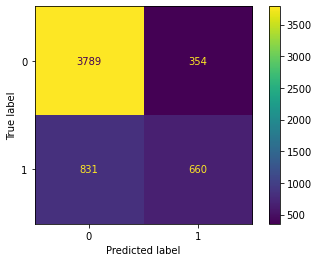



Confusion matrix for the test set
[[956  75]
 [205 173]]


/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


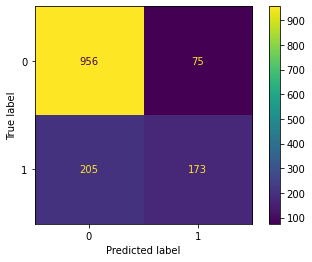

In [21]:
## Visual performance 

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')

# KNN

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [23]:

# initialize model (set parameters)
neigh = KNeighborsClassifier(n_neighbors=3) # n_neighbors = K

neigh.fit(X_train_scaled ,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
## Data splitting
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)



In [25]:
y_train

5305    0
3351    1
5177    1
1460    1
4010    0
       ..
1293    0
4023    0
5200    0
3775    1
1945    0
Name: Churn, Length: 5634, dtype: int64

In [26]:
# make predictions
y_pred_train_knn = neigh.predict(X_train_scaled)
y_pred_test_knn  = neigh.predict(X_test_scaled)


In [27]:
y_pred_train_knn

array([0, 0, 1, ..., 0, 1, 0])

In [28]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.861732,0.770759
1,Precision,0.782092,0.588997
2,Recall,0.661972,0.481481


Confusion matrix for the train set
[[3868  275]
 [ 504  987]]


/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


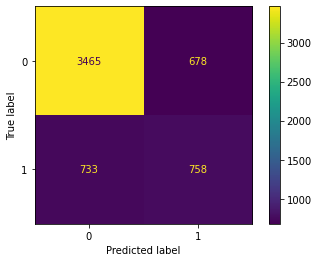

Confusion matrix for the test set
[[904 127]
 [196 182]]


/opt/anaconda3/envs/DA/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


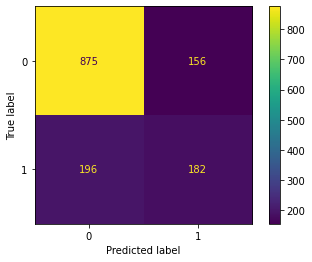

In [29]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_mod,y_train, values_format = 'd')
plt.show()


print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_mod,y_test, values_format = 'd')
plt.show()

In [30]:
from sklearn import metrics


k_range = range(1,21)
scores = {}
scores_list = []
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_scaled,y_train)
    y_pred_test_knn  = neigh.predict(X_test_scaled)
    scores[k] = metrics.accuracy_score(y_test, y_pred_test_knn)
    scores_list.append(metrics.accuracy_score(y_test, y_pred_test_knn))




In [73]:
# assign to n_neighbors the best performing value
knn_model  = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X,y)

y_pred_train_knn = neigh.predict(X_train_scaled)
y_pred_test_knn  = neigh.predict(X_test_scaled)

In [74]:
# for loop to try many values of k

full_knn = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train_scaled)
    y_pred_test_knn  = neigh.predict(X_test_scaled)

    temp_knn = pd.DataFrame({'k': [k]*3, 'Error_metric': ['Accuracy','Precision','Recall'],
                'Train': [accuracy_score(y_train, y_pred_train_knn),
                         precision_score(y_train, y_pred_train_knn,pos_label =1),
                         recall_score(y_train, y_pred_train_knn,pos_label = 1)],
                'Test': [accuracy_score(y_test, y_pred_test_knn),
                         precision_score(y_test, y_pred_test_knn,pos_label = 1),
                         recall_score(y_test, y_pred_test_knn,pos_label = 1
                                                    )]})
    full_knn = pd.concat([full_knn,temp_knn], axis=0)
full_knn

ValueError: Found input variables with inconsistent numbers of samples: [4930, 5634]

In [33]:
full_knn[full_knn['Error_metric'] == 'Accuracy']

,k,Error_metric,Train,Test
0,2,Accuracy,0.865815,0.766501
0,3,Accuracy,0.862442,0.771469
0,4,Accuracy,0.840433,0.784244
0,5,Accuracy,0.839901,0.779986
0,6,Accuracy,0.828718,0.780696
0,7,Accuracy,0.828718,0.778566
0,8,Accuracy,0.820909,0.784244
0,9,Accuracy,0.819134,0.787793
0,10,Accuracy,0.812567,0.788502
0,11,Accuracy,0.815584,0.791341


In [34]:
full_knn2 = full_knn.melt(id_vars=['k','Error_metric'])
full_knn2

,k,Error_metric,variable,value
0,2,Accuracy,Train,0.865815
1,2,Precision,Train,0.988048
2,2,Recall,Train,0.498994
3,3,Accuracy,Train,0.862442
4,3,Precision,Train,0.785486
...,...,...,...,...
109,19,Precision,Test,0.671480
110,19,Recall,Test,0.492063
111,20,Accuracy,Test,0.801278
112,20,Precision,Test,0.699187


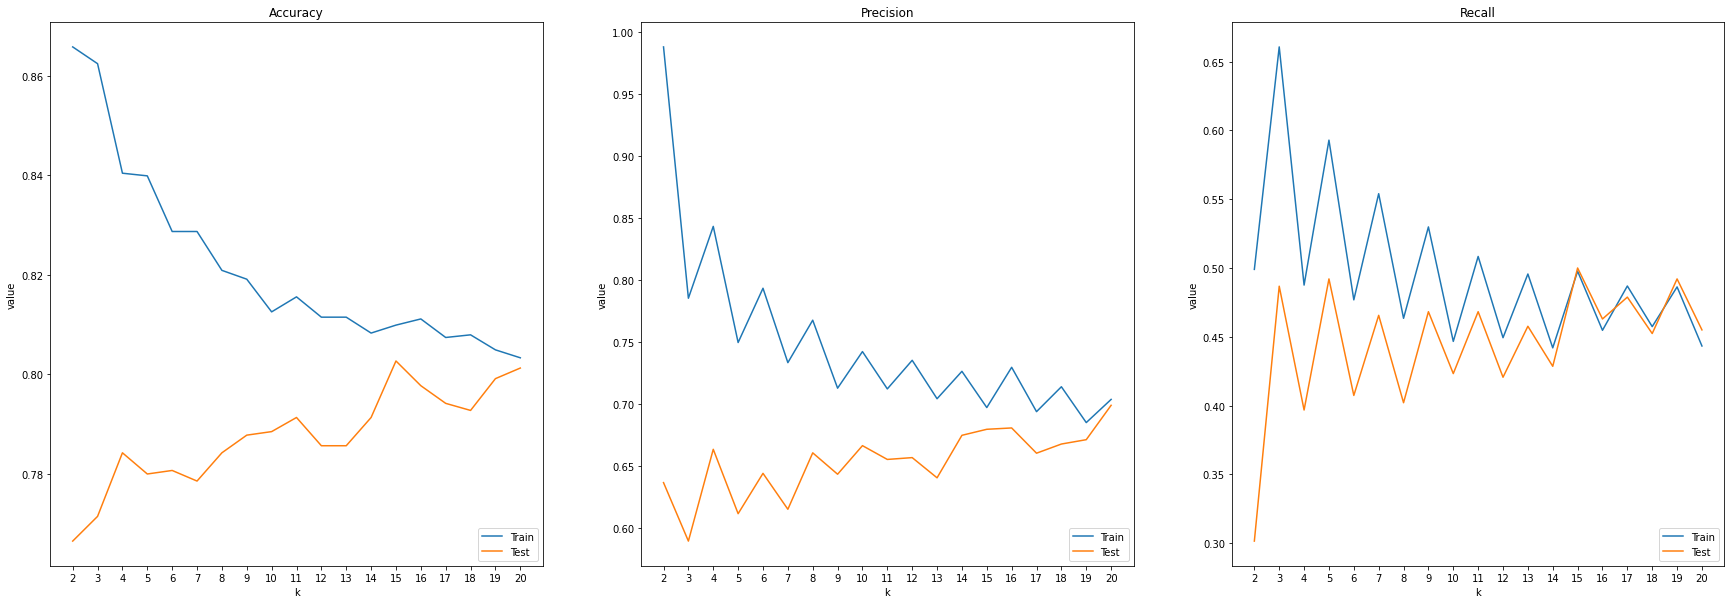

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(1,3, figsize=(30,10))
sns.lineplot(x = 'k', y = 'value', data = full_knn2[full_knn2['Error_metric'] == 'Accuracy'], hue = 'variable', ax = ax[0])
ax[0].set_xticks(range(2,21))
ax[0].set_title('Accuracy')
ax[0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full_knn2[full_knn2['Error_metric'] == 'Precision'], hue = 'variable', ax = ax[1])
ax[1].set_xticks(range(2,21))
ax[1].set_title('Precision')
ax[1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full_knn2[full_knn2['Error_metric'] == 'Recall'], hue = 'variable', ax = ax[2])
ax[2].set_xticks(range(2,21))
ax[2].set_title('Recall')
ax[2].legend(loc='lower right')



In [36]:
full_knn2[full_knn2['k']==20]

,k,Error_metric,variable,value
54,20,Accuracy,Train,0.803337
55,20,Precision,Train,0.703940
56,20,Recall,Train,0.443327
111,20,Accuracy,Test,0.801278
112,20,Precision,Test,0.699187
113,20,Recall,Test,0.455026


## Decision Tree 

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


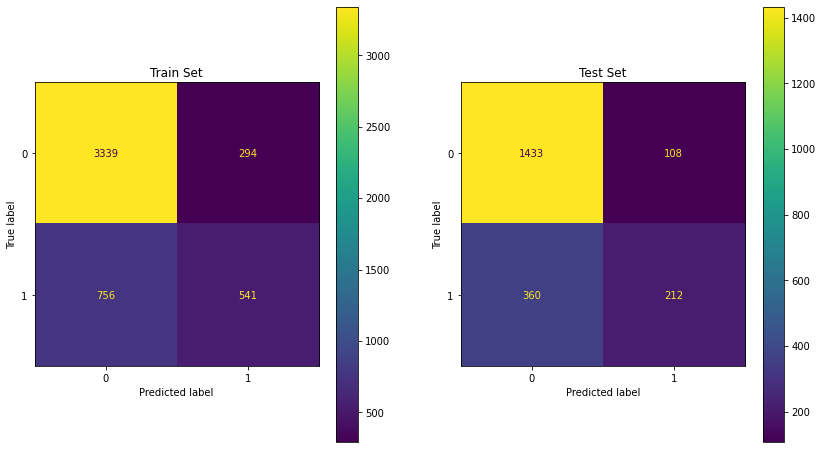

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X = df_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt_model = DecisionTreeClassifier(max_depth=3)

dt_model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt_model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt_model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [39]:
X = pd.(X)

#df = X.rename(columns={"old_col1": "new_col1", "old_col2": "new_col2"})

SyntaxError: invalid syntax (4270676890.py, line 1)

In [ ]:
X

In [ ]:
# Feature Importance 

plt.figure(figsize=(20,14))
plt.barh(X.columns,dt_model.feature_importances_)

In [ ]:
## Since 

X_imp = X[['TotalCharges', 'tenure']]

In [ ]:
## Visualizing the tree 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [ ]:
len(X_imp)

In [ ]:
X_imp['tenure'].describe()


# Comparing Performance 

In [69]:
performance_log 
 
log_scores = cross_val_score(log_model, X_train_log, y_train, cv = 10)  # n of samples
log_scores

array([0.78296146, 0.79513185, 0.81135903, 0.76673428, 0.78296146,
       0.80324544, 0.79107505, 0.79310345, 0.78093306, 0.80933063])

In [75]:
performance_knn


knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv = 10)  # n of samples
knn_scores

ValueError: Found input variables with inconsistent numbers of samples: [5634, 4930]

In [63]:
performance_df


df_scores = cross_val_score(dt_model, X_train, y_train, cv = 10)  # n of samples
df_scores

array([0.78498986, 0.78701826, 0.80527383, 0.78498986, 0.78296146,
       0.76673428, 0.79918864, 0.77890467, 0.77079108, 0.80527383])

## Imbalanced data 

In [10]:
category_0 = churnData[churnData['Churn'] == 0]
category_1 = churnData[churnData['Churn'] == 1]  # remained customer 

In [11]:
print(category_0.shape)
print(category_1.shape)

(5174, 16)
(1869, 16)


In [12]:
category_0_down = category_0.sample(len(category_1,))
print(category_0_down.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [13]:
data_down = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data_down = data_down.sample(frac=1)
data_down['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [14]:
data_down.to_csv('churn_downsampled.csv') 

## Upsampling Method 

In [15]:
category_0 = churnData[churnData['Churn'] == 0]
category_1 = churnData[churnData['Churn'] == 1]

In [16]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 16)


In [59]:
category_1_up

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
5863,Female,0,No,No,21,Yes,No,No,No,No,Yes,Yes,Month-to-month,97.35,2119.50,1
4393,Female,0,Yes,No,21,Yes,No,No,No,No,No,Yes,Month-to-month,86.50,1808.70,1
5064,Male,0,No,No,2,No,No,Yes,Yes,Yes,No,No,Month-to-month,40.40,77.15,1
2688,Male,0,Yes,No,5,Yes,No,Yes,No,No,No,No,Month-to-month,78.75,412.10,1
728,Female,1,No,No,30,Yes,Yes,Yes,Yes,No,No,No,Month-to-month,91.70,2758.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,Male,0,No,No,4,Yes,No,No,No,No,No,Yes,Month-to-month,79.90,324.30,1
2577,Female,0,No,No,1,Yes,No,No,No,No,Yes,Yes,Month-to-month,94.60,94.60,1
1310,Female,0,Yes,No,34,Yes,No,No,No,No,Yes,Yes,Month-to-month,97.65,3207.55,1
334,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,Month-to-month,80.60,155.80,1


In [17]:
category_1_up.shape

(5174, 16)

In [18]:
data_up = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
data_up = data_up.sample(frac=1)
data_up['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [19]:
data_up.to_csv('churn_upsampled.csv') 